In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("A:\Dataset\SDGData.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\astik\AppData\Local\Temp\ipykernel_4148\1746658518.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("A:\Dataset\SDGData.csv")


,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 33
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,74.384239,74.382220,74.313160,75.349325,75.788522,76.214138,...,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,57.770273,61.405699,61.960592,63.047098,63.573115,64.038528,...,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,92.295464,92.272677,91.598673,92.425584,92.628785,92.862801,...,95.837901,95.985879,96.006040,96.386068,96.411432,96.574021,96.704393,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98620,Zimbabwe,ZWE,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,NaN,36.512001,36.386002,35.950001,36.070000,36.991001,...,34.169998,34.146999,34.007999,34.049999,33.979000,33.898998,33.848999,33.888000,33.872002,NaN
98621,Zimbabwe,ZWE,"Water productivity, total (constant 2010 US$ G...",ER.GDP.FWTL.M3.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98622,Zimbabwe,ZWE,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,58.800000,NaN,NaN,NaN,59.900000,NaN,NaN,NaN,NaN
98623,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,6.400000,NaN,...,NaN,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98625 entries, 0 to 98624
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    98625 non-null  object 
 1   Country Code    98625 non-null  object 
 2   Indicator Name  98625 non-null  object 
 3   Indicator Code  98625 non-null  object 
 4   1990            23642 non-null  float64
 5   1991            27161 non-null  float64
 6   1992            28115 non-null  float64
 7   1993            27951 non-null  float64
 8   1994            28327 non-null  float64
 9   1995            30407 non-null  float64
 10  1996            29925 non-null  float64
 11  1997            30230 non-null  float64
 12  1998            30416 non-null  float64
 13  1999            32695 non-null  float64
 14  2000            42723 non-null  float64
 15  2001            37162 non-null  float64
 16  2002            38289 non-null  float64
 17  2003            37468 non-null 

In [7]:
df.describe()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 33
count,2.364200e+04,2.716100e+04,2.811500e+04,2.795100e+04,2.832700e+04,3.040700e+04,2.992500e+04,3.023000e+04,3.041600e+04,3.269500e+04,...,4.877200e+04,4.659700e+04,4.563600e+04,4.438400e+04,4.706500e+04,4.591800e+04,4.248600e+04,3.280000e+04,7.980000e+03,0.0
mean,6.571336e+11,6.209832e+11,6.270312e+11,6.582118e+11,7.002313e+11,7.063041e+11,7.641963e+11,7.907028e+11,7.942244e+11,7.659648e+11,...,1.265710e+12,1.447363e+12,1.549873e+12,1.730737e+12,1.734619e+12,1.840613e+12,2.147999e+12,2.971673e+12,3.438484e+09,NaN
std,3.399736e+13,3.503527e+13,3.580305e+13,3.697540e+13,3.755339e+13,3.816656e+13,4.071455e+13,4.167593e+13,4.040780e+13,3.948352e+13,...,7.347648e+13,8.209464e+13,8.708781e+13,9.785621e+13,1.033979e+14,1.083446e+14,1.233104e+14,1.533474e+14,1.177061e+11,NaN
min,-3.619500e+08,-3.976060e+08,-2.117171e+09,-2.869494e+08,-1.145700e+08,-1.874667e+09,-1.127467e+09,-3.112961e+08,-2.408000e+08,-1.865621e+09,...,-2.200560e+10,-1.192054e+10,-1.634983e+10,-2.837521e+10,-2.393111e+10,-2.426612e+10,-2.887261e+10,-3.948228e+10,0.000000e+00,NaN
25%,3.830645e+00,4.763615e+00,4.952629e+00,5.000000e+00,5.161254e+00,5.479790e+00,5.310000e+00,5.450117e+00,5.389171e+00,5.600000e+00,...,5.500000e+00,6.000000e+00,6.000000e+00,5.950913e+00,6.088840e+00,6.000000e+00,5.910805e+00,6.753550e+00,7.000000e+00,NaN
50%,3.781024e+01,3.185227e+01,3.300000e+01,3.176700e+01,3.276937e+01,3.350903e+01,3.236267e+01,3.340446e+01,3.127722e+01,3.079700e+01,...,2.704467e+01,3.397000e+01,3.334336e+01,3.340000e+01,3.632044e+01,3.056034e+01,2.883364e+01,3.683318e+01,2.114947e+01,NaN
75%,2.597694e+03,1.900643e+03,2.143144e+03,2.068135e+03,2.257003e+03,1.902779e+03,2.523300e+03,3.015200e+03,2.664690e+03,1.701164e+03,...,9.940000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,5.145235e+02,5.748125e+01,NaN
max,2.990448e+15,3.357095e+15,3.451195e+15,3.495207e+15,3.672538e+15,3.974421e+15,4.285149e+15,4.486546e+15,3.897609e+15,3.928444e+15,...,6.864133e+15,7.831726e+15,8.615704e+15,9.933968e+15,1.151749e+16,1.152633e+16,1.315126e+16,1.531653e+16,6.827586e+12,NaN


In [9]:
df.drop(['Unnamed: 33'],axis=1,inplace=True)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,74.384239,74.382220,74.313160,75.349325,75.788522,76.214138,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,57.770273,61.405699,61.960592,63.047098,63.573115,64.038528,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,92.295464,92.272677,91.598673,92.425584,92.628785,92.862801,...,95.126062,95.837901,95.985879,96.006040,96.386068,96.411432,96.574021,96.704393,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98620,Zimbabwe,ZWE,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,NaN,36.512001,36.386002,35.950001,36.070000,36.991001,...,34.316002,34.169998,34.146999,34.007999,34.049999,33.979000,33.898998,33.848999,33.888000,33.872002
98621,Zimbabwe,ZWE,"Water productivity, total (constant 2010 US$ G...",ER.GDP.FWTL.M3.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98622,Zimbabwe,ZWE,Women making their own informed decisions rega...,SG.DMK.SRCR.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,58.800000,NaN,NaN,NaN,59.900000,NaN,NaN,NaN
98623,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,6.400000,NaN,...,NaN,NaN,3.900000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN


In [11]:

df['1990'].fillna(df['1991'].median(skipna=True),inplace=True)
df['1991'].fillna(df['1992'].median(skipna=True),inplace=True)
df['1992'].fillna(df['1993'].median(skipna=True),inplace=True)
df['1993'].fillna(df['1994'].median(skipna=True),inplace=True)
df['1994'].fillna(df['1995'].median(skipna=True),inplace=True)
df['1995'].fillna(df['1996'].median(skipna=True),inplace=True)
df['1996'].fillna(df['1997'].median(skipna=True),inplace=True)
df['1997'].fillna(df['1998'].median(skipna=True),inplace=True)
df['1998'].fillna(df['1999'].median(skipna=True),inplace=True)
df['1999'].fillna(df['2000'].median(skipna=True),inplace=True)
df['2001'].fillna(df['2002'].median(skipna=True),inplace=True)
df['2002'].fillna(df['2003'].median(skipna=True),inplace=True)
df['2003'].fillna(df['2004'].median(skipna=True),inplace=True)
df['2004'].fillna(df['2005'].median(skipna=True),inplace=True)
df['2005'].fillna(df['2006'].median(skipna=True),inplace=True)
df['2006'].fillna(df['2007'].median(skipna=True),inplace=True)
df['2007'].fillna(df['2008'].median(skipna=True),inplace=True)
df['2008'].fillna(df['2009'].median(skipna=True),inplace=True)
df['2009'].fillna(df['2010'].median(skipna=True),inplace=True)
df['2010'].fillna(df['2011'].median(skipna=True),inplace=True)
df['2011'].fillna(df['2012'].median(skipna=True),inplace=True)
df['2012'].fillna(df['2013'].median(skipna=True),inplace=True)
df['2013'].fillna(df['2014'].median(skipna=True),inplace=True)
df['2014'].fillna(df['2015'].median(skipna=True),inplace=True)
df['2015'].fillna(df['2016'].median(skipna=True),inplace=True)
df['2016'].fillna(df['2017'].median(skipna=True),inplace=True)
df['2017'].fillna(df['2018'].median(skipna=True),inplace=True)
df['2018'].fillna(df['2018'].median(skipna=True),inplace=True)

C:\Users\astik\AppData\Local\Temp\ipykernel_4148\24704612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['1990'].fillna(df['1991'].median(skipna=True),inplace=True)
C:\Users\astik\AppData\Local\Temp\ipykernel_4148\24704612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [13]:
df.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1990                  0
1991                  0
1992                  0
1993                  0
1994                  0
1995                  0
1996                  0
1997                  0
1998                  0
1999                  0
2000              55902
2001                  0
2002                  0
2003                  0
2004                  0
2005                  0
2006                  0
2007                  0
2008                  0
2009                  0
2010                  0
2011                  0
2012                  0
2013                  0
2014                  0
2015                  0
2016                  0
2017                  0
2018                  0
dtype: int64

In [15]:
df['2000'].fillna(df['2000'].median(skipna=True),inplace=True)

C:\Users\astik\AppData\Local\Temp\ipykernel_4148\3436971744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['2000'].fillna(df['2000'].median(skipna=True),inplace=True)


In [17]:

df.isna().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
dtype: int64

In [19]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [21]:
df.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],axis=1,inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,31.852267,33.000000,31.767000,32.769371,33.509031,32.362671,33.404465,31.277219,30.797001,28.084999,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,21.149471,21.149471
1,74.384239,74.382220,74.313160,75.349325,75.788522,76.214138,77.205150,77.573730,78.395511,78.965532,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,21.149471,21.149471
2,57.770273,61.405699,61.960592,63.047098,63.573115,64.038528,65.532096,66.165470,67.554963,68.451927,...,73.530494,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,21.149471,21.149471
3,92.295464,92.272677,91.598673,92.425584,92.628785,92.862801,93.073157,93.211144,93.389425,93.531964,...,95.126062,95.837901,95.985879,96.006040,96.386068,96.411432,96.574021,96.704393,21.149471,21.149471
4,31.852267,33.000000,31.767000,32.769371,33.509031,32.362671,33.404465,31.277219,30.797001,28.084999,...,27.044674,33.970000,22.260538,33.400000,36.320442,30.277130,28.833641,36.833180,37.165211,21.149471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98620,31.852267,36.512001,36.386002,35.950001,36.070000,36.991001,38.160000,39.195999,39.347000,39.345001,...,34.316002,34.169998,34.146999,34.007999,34.049999,33.979000,33.898998,33.848999,33.888000,33.872002
98621,31.852267,33.000000,31.767000,32.769371,33.509031,32.362671,33.404465,31.277219,30.797001,28.084999,...,27.044674,33.970000,33.343365,33.400000,36.320442,30.560337,28.833641,36.833180,21.149471,21.149471
98622,31.852267,33.000000,31.767000,32.769371,33.509031,32.362671,33.404465,31.277219,30.797001,28.084999,...,27.044674,33.970000,58.800000,33.400000,36.320442,30.560337,59.900000,36.833180,21.149471,21.149471
98623,31.852267,33.000000,31.767000,32.769371,6.400000,32.362671,33.404465,31.277219,30.797001,4.600000,...,27.044674,33.970000,3.900000,33.400000,36.320442,30.560337,3.700000,36.833180,21.149471,21.149471


In [23]:
model=KMeans(n_clusters=1,init='k-means++',random_state=0)
y_kmeans=model.fit_predict(df.iloc[:,[5,6]].values)

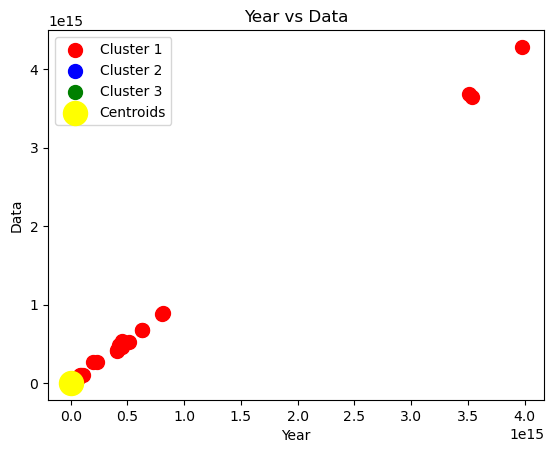

In [25]:
X=df.iloc[:,[5,6]].values
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100,c='green',label='Cluster 3')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Year vs Data')
plt.xlabel('Year')
plt.ylabel('Data')
plt.legend()
plt.show()

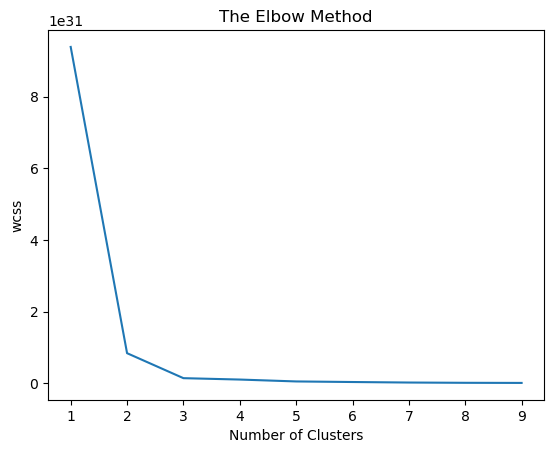

In [26]:
wcss=[]
for i in range(1,10):
    model=KMeans(n_clusters=i,init='k-means++',random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
model=KMeans(n_clusters=5,init='k-means++',random_state=6)
y_kmeans=model.fit_predict(X)

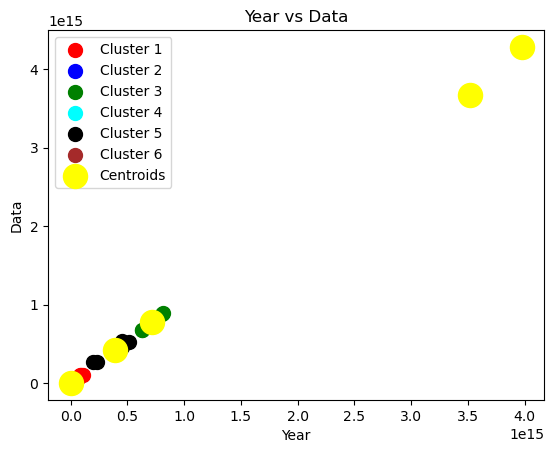

In [29]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100,c='black',label='Cluster 5')
plt.scatter(X[y_kmeans == 5,0],X[y_kmeans == 5,1],s=100,c='brown',label='Cluster 6')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Year vs Data')
plt.xlabel('Year')
plt.ylabel('Data')
plt.legend()
plt.show()